# Linear Regression

Let's import the required libraries and dataset (Boston Housing Dataset) available in scikit_learn libarary.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn


Loading Boston dataset and libarary

In [3]:
from sklearn.datasets import load_boston
Bos_data = load_boston()

Let's see the summary stats and explore the dataset

In [4]:
Bos_data

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [5]:
#  , lets check the datashape
print(Bos_data.data.shape)

(506, 13)


In [6]:
#let's load convert everything in pandas (pd) dataframe, as well convert index to index to columns

data_x=pd.DataFrame(Bos_data.data,columns=Bos_data.feature_names)

# and the target as well

data_y=pd.DataFrame(Bos_data.target)

In [7]:
# lets check the datashape now

print(data_x.shape)

(506, 13)


In [8]:
#lets see how the data looks like now

print(data_x.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [9]:
# Let's get the stats of the dataset

data_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
# may be its better idea we can just pring the first 5 record of the dataset to have better view

print(data_x.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [11]:
# its all about house price that we are trying to predict therefore dont really need the above stats but in most case its useful.
# To predict the house price we are appling the linear model which is known for prediction

model = linear_model.LinearRegression()

In [12]:
# splitting the dataset into training and test to validate the model 

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 4 )

In [13]:
# fitting the model

model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# lets find out the weights which are optimal, 13 weighs 1 for each co-efficient

model.coef_

array([[ -1.14743504e-01,   4.70875035e-02,   8.70282354e-03,
          3.23818824e+00,  -1.67240567e+01,   3.87662996e+00,
         -1.08218769e-02,  -1.54144627e+00,   2.92604151e-01,
         -1.33989537e-02,  -9.07306805e-01,   8.91271054e-03,
         -4.58747039e-01]])

In [15]:
# lets also find out the intercept of the model

model.intercept_

array([ 35.60325757])

In [16]:
model.score(x_test, y_test)

0.72647013796829429

In [17]:
# Let's predict the housing prices

results = model.predict(x_test)

In [18]:
# Printing the Prediction of the house prices


print(results[0:10])

[[ 12.06508881]
 [ 26.98544801]
 [ 17.59242607]
 [ 18.15842166]
 [ 36.91656975]
 [ 25.43573299]
 [ 31.08610267]
 [ 19.7198111 ]
 [ 19.63707329]
 [ 22.95805783]]


In [19]:
# Let's compare the prediction with actual values, as we can see the values are predicted values are very close from actual
# values therefore we can say that our model is quiet good in predicting the house prices.

print(y_test)

        0
8    16.5
289  24.8
68   17.4
211  19.3
226  37.6
70   24.2
55   35.4
470  19.9
409  27.5
154  17.0
344  31.2
272  24.4
310  16.1
160  27.0
319  21.0
454  14.9
11   18.9
399   6.3
413  16.3
25   13.9
418   8.8
153  19.4
124  18.8
108  19.8
345  17.5
103  19.3
209  20.0
129  14.3
432  16.1
106  19.5
..    ...
63   25.0
239  23.3
123  17.3
64   33.0
139  17.8
314  23.8
427  10.9
102  18.6
45   19.3
476  16.7
80   28.0
14   18.2
278  29.1
505  11.9
341  32.7
497  18.3
212  22.4
280  45.4
229  31.5
203  48.5
317  19.8
232  41.7
327  22.2
309  20.3
269  20.7
368  50.0
144  11.8
336  19.5
437   8.7
216  23.3

[102 rows x 1 columns]


Text(0.5,1,'Prices vs Predicted prices')

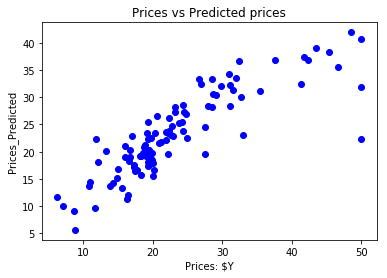

In [20]:
# Let's get that ourput plotted on a graph

plt.scatter(y_test, results, c='b')
plt.xlabel("Prices: $Y")
plt.ylabel("Prices_Predicted")
plt.title("Prices vs Predicted prices")

In [21]:
# mean of erros square
mse = sklearn.metrics.mean_squared_error(y_test, results)
print(mse)

25.4079767171
